<a href="https://colab.research.google.com/github/MarkNgendo/ANALYSIS-OF-COVID19-SCURGE-IN-KENYA/blob/main/Moringa_Data_Science_Prep_W5_Independent_Project_2021_03_Abbraca_Data_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Python libraries and loading the dataset**

In [ ]:
#importing the python libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
#Loading the dataset to our working directory
covid = pd.read_excel('covid19KE.xlsx')
covid

# let us preview the first 10 rows of our dataset

covid.head()

,Date,Sample size,Positive cases,Male,Female,Recoveries,Deaths,Nairobi,Mombasa,Vihiga,Kiambu,Kisii,Bungoma,Nyamira,Kakamega,Kisumu,Busia,Kirinyaga,Murang'a,Bomet,Migori,Trans-Nzoia,Siaya,Uasin Gishu,Kericho,Homa Bay,Nyeri,Nandi,Nakuru,Machakos,Embu,Meru,Nyandarua,Tharaka-Nithi,Elgeyo-Marakwet,Makueni,Kilifi,Kwale,West Pokot,Narok,Baringo,Laikipia,Kajiado,Kitui,Mandera,Lamu,Taita–Taveta,Garissa,Samburu,Wajir,Turkana,Isiolo,Tana River,Marsabit
0,2020-03-12,21.0,1.0,0.0,1.0,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-13,20.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-14,20.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-15,30.0,2.0,2.0,0.0,0.0,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-16,10.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preparation

## Accessing more information of the dataset

In [ ]:
#Let us get to know more about our dataset by accessing its information
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             370 non-null    datetime64[ns]
 1   Sample size      338 non-null    float64       
 2   Positive cases   338 non-null    float64       
 3   Male             325 non-null    float64       
 4   Female           324 non-null    float64       
 5   Recoveries       325 non-null    float64       
 6   Deaths           313 non-null    object        
 7   Nairobi          316 non-null    float64       
 8   Mombasa          292 non-null    float64       
 9   Vihiga           62 non-null     float64       
 10  Kiambu           255 non-null    float64       
 11  Kisii            128 non-null    float64       
 12  Bungoma          95 non-null     float64       
 13  Nyamira          69 non-null     float64       
 14  Kakamega         126 non-null    float64  

### (i) Accuracy

In [ ]:
# Ensuring the sum of positive cases add up to sample size:

covid['Positive cases'] = covid['Male'] + covid['Female']

covid['Deaths'] = covid['Deaths'].replace('-', 0)


### (ii) Missing data/ Completeness

In [ ]:
#We will now check how many missing values we have in each column
covid.isnull().sum()

Date                 0
Sample size         32
Positive cases      46
Male                45
Female              46
Recoveries          45
Deaths              57
Nairobi             54
Mombasa             78
Vihiga             308
Kiambu             115
Kisii              242
Bungoma            275
Nyamira            301
Kakamega           244
Kisumu             184
Busia              164
Kirinyaga          285
Murang'a           209
Bomet              296
Migori             266
Trans-Nzoia        271
Siaya              256
Uasin Gishu        165
Kericho            251
Homa Bay           286
Nyeri              230
Nandi              274
Nakuru             154
Machakos           144
Embu               259
Meru               214
Nyandarua          291
Tharaka-Nithi      308
Elgeyo-Marakwet    320
Makueni            253
Kilifi             181
Kwale              255
West Pokot         336
Narok              269
Baringo            317
Laikipia           242
Kajiado            128
Kitui      

In [ ]:
# Dropping rows with entire missing values
covid.shape


(370, 54)

In [ ]:
covid = covid[covid['Sample size'].notna()]
covid.head()

,Date,Sample size,Positive cases,Male,Female,Recoveries,Deaths,Nairobi,Mombasa,Vihiga,Kiambu,Kisii,Bungoma,Nyamira,Kakamega,Kisumu,Busia,Kirinyaga,Murang'a,Bomet,Migori,Trans-Nzoia,Siaya,Uasin Gishu,Kericho,Homa Bay,Nyeri,Nandi,Nakuru,Machakos,Embu,Meru,Nyandarua,Tharaka-Nithi,Elgeyo-Marakwet,Makueni,Kilifi,Kwale,West Pokot,Narok,Baringo,Laikipia,Kajiado,Kitui,Mandera,Lamu,Taita–Taveta,Garissa,Samburu,Wajir,Turkana,Isiolo,Tana River,Marsabit
0,2020-03-12,21.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-13,20.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-14,20.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-15,30.0,2.0,2.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-16,10.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Replacing the missing values with zero
covid = covid.fillna(0)
covid

,Date,Sample size,Positive cases,Male,Female,Recoveries,Deaths,Nairobi,Mombasa,Vihiga,Kiambu,Kisii,Bungoma,Nyamira,Kakamega,Kisumu,Busia,Kirinyaga,Murang'a,Bomet,Migori,Trans-Nzoia,Siaya,Uasin Gishu,Kericho,Homa Bay,Nyeri,Nandi,Nakuru,Machakos,Embu,Meru,Nyandarua,Tharaka-Nithi,Elgeyo-Marakwet,Makueni,Kilifi,Kwale,West Pokot,Narok,Baringo,Laikipia,Kajiado,Kitui,Mandera,Lamu,Taita–Taveta,Garissa,Samburu,Wajir,Turkana,Isiolo,Tana River,Marsabit
0,2020-03-12,21.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-13,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-14,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-15,30.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-16,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2021-02-20,3734.0,152.0,104.0,48.0,28.0,4.0,105.0,8.0,0.0,7.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,2.0,1.0,8.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
346,2021-02-21,3415.0,208.0,147.0,61.0,37.0,6.0,128.0,14.0,0.0,27.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,6.0,4.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
347,2021-02-22,3573.0,105.0,72.0,33.0,49.0,4.0,68.0,3.0,0.0,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,2021-02-23,3935.0,194.0,108.0,86.0,39.0,10.0,132.0,4.0,0.0,9.0,2.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,7.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0


In [ ]:
# Veryfying that there are no missing values
covid.isnull().sum().sum()

0

In [ ]:
# Checking the shape of the new dataframe
covid.shape

(338, 54)

### (iii) Duplicates / Consitency

In [ ]:
#We will now identify which obseervations are duplicate
covid.duplicated().sum()

0

In [ ]:
#Drop duplicate
covid = covid.drop_duplicates()
covid.head()

,Date,Sample size,Positive cases,Male,Female,Recoveries,Deaths,Nairobi,Mombasa,Vihiga,Kiambu,Kisii,Bungoma,Nyamira,Kakamega,Kisumu,Busia,Kirinyaga,Murang'a,Bomet,Migori,Trans-Nzoia,Siaya,Uasin Gishu,Kericho,Homa Bay,Nyeri,Nandi,Nakuru,Machakos,Embu,Meru,Nyandarua,Tharaka-Nithi,Elgeyo-Marakwet,Makueni,Kilifi,Kwale,West Pokot,Narok,Baringo,Laikipia,Kajiado,Kitui,Mandera,Lamu,Taita–Taveta,Garissa,Samburu,Wajir,Turkana,Isiolo,Tana River,Marsabit
0,2020-03-12,21.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-13,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-14,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-15,30.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-16,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### (iv)Uniformity

In [ ]:
covid.columns = covid.columns.str.strip().str.replace(' ','_')
covid.columns

Index(['Date', 'Sample_size', 'Positive_cases', 'Male', 'Female', 'Recoveries',
       'Deaths', 'Nairobi', 'Mombasa', 'Vihiga', 'Kiambu', 'Kisii', 'Bungoma',
       'Nyamira', 'Kakamega', 'Kisumu', 'Busia', 'Kirinyaga', 'Murang'a',
       'Bomet', 'Migori', 'Trans-Nzoia', 'Siaya', 'Uasin_Gishu', 'Kericho',
       'Homa_Bay', 'Nyeri', 'Nandi', 'Nakuru', 'Machakos', 'Embu', 'Meru',
       'Nyandarua', 'Tharaka-Nithi', 'Elgeyo-Marakwet', 'Makueni', 'Kilifi',
       'Kwale', 'West_Pokot', 'Narok', 'Baringo', 'Laikipia', 'Kajiado',
       'Kitui', 'Mandera', 'Lamu', 'Taita–Taveta', 'Garissa', 'Samburu',
       'Wajir', 'Turkana', 'Isiolo', 'Tana_River', 'Marsabit'],
      dtype='object')

Converting the columns name to lowercase

In [ ]:
covid.columns=map(str.lower,covid.columns)
covid.columns

Index(['date', 'sample_size', 'positive_cases', 'male', 'female', 'recoveries',
       'deaths', 'nairobi', 'mombasa', 'vihiga', 'kiambu', 'kisii', 'bungoma',
       'nyamira', 'kakamega', 'kisumu', 'busia', 'kirinyaga', 'murang'a',
       'bomet', 'migori', 'trans-nzoia', 'siaya', 'uasin_gishu', 'kericho',
       'homa_bay', 'nyeri', 'nandi', 'nakuru', 'machakos', 'embu', 'meru',
       'nyandarua', 'tharaka-nithi', 'elgeyo-marakwet', 'makueni', 'kilifi',
       'kwale', 'west_pokot', 'narok', 'baringo', 'laikipia', 'kajiado',
       'kitui', 'mandera', 'lamu', 'taita–taveta', 'garissa', 'samburu',
       'wajir', 'turkana', 'isiolo', 'tana_river', 'marsabit'],
      dtype='object')

 Extracting months and years from the respective dates.

In [ ]:
months = {3 : 'March', 4: 'April', 5 : 'May', 6: 'June', 7 : 'July', 8: 'August', 9: 'September',
      10: 'October', 11 : 'November', 12: 'December', 1: 'January', 2: 'February'} 

covid['month'] = covid['date'].dt.month.map(months)

covid['year'] = covid['date'].dt.year.map({2020 : 2020, 2021: 2021})

covid.sample(5)

,date,sample_size,positive_cases,male,female,recoveries,deaths,nairobi,mombasa,vihiga,kiambu,kisii,bungoma,nyamira,kakamega,kisumu,busia,kirinyaga,murang'a,bomet,migori,trans-nzoia,siaya,uasin_gishu,kericho,homa_bay,nyeri,nandi,nakuru,machakos,embu,meru,nyandarua,tharaka-nithi,elgeyo-marakwet,makueni,kilifi,kwale,west_pokot,narok,baringo,laikipia,kajiado,kitui,mandera,lamu,taita–taveta,garissa,samburu,wajir,turkana,isiolo,tana_river,marsabit,month,year
49,2020-04-30,777.0,12.0,9.0,3.0,15.0,2.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,April,2020
183,2020-09-11,4609.0,190.0,136.0,54.0,395.0,4.0,65.0,16.0,0.0,6.0,9.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,2.0,0.0,2.0,0.0,13.0,4.0,0.0,0.0,0.0,4.0,4.0,10.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,6.0,27.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,September,2020
149,2020-08-08,7175.0,699.0,427.0,272.0,781.0,5.0,414.0,9.0,0.0,54.0,5.0,7.0,0.0,0.0,2.0,9.0,0.0,2.0,3.0,3.0,1.0,1.0,15.0,6.0,4.0,0.0,3.0,21.0,36.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,81.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,August,2020
0,2020-03-12,21.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,March,2020
71,2020-05-22,3724.0,62.0,42.0,20.0,4.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,May,2020


In [ ]:
# Ensuring all data in the deaths column is a number and converting from string to float values

covid['deaths'] = covid['deaths'].replace('-', 0).astype(float)

covid['deaths'].dtypes

dtype('float64')

## Exporting the cleaned CSV file.

In [ ]:
# Converting the cleaned dataset to a csv file
covid.to_csv('covid.csv')

## **ANALYSIS**

### **2.DATA VISUALIZATION**

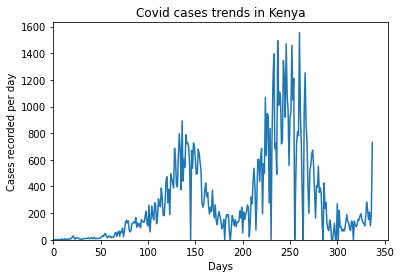

In [ ]:
#Trend lines showing covid cases reported in kenya from March 2020 to Feb 2021

fig = plt.figure()
covid=pd.read_csv('covid.csv')
plt.plot(covid['positive_cases'])
plt.xlabel('Days')
plt.ylabel('Cases recorded per day')
plt.title('Covid cases trends in Kenya')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
fig.savefig('COVID trend in Kenya.png')



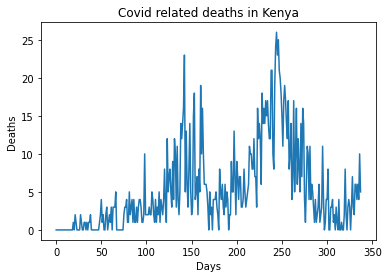

In [ ]:
#Trend line for covid related deaths in kenya
fig = plt.figure()
plt.plot(covid['deaths'])
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.title('Covid related deaths in Kenya')

fig.savefig('covid deaths in Kenya.png')

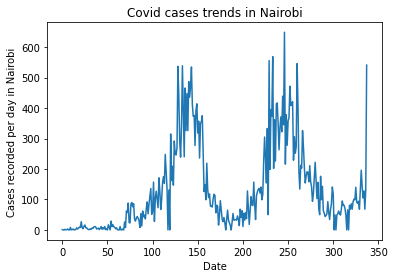

In [ ]:
fig = plt.figure()
plt.plot(covid['nairobi'])
plt.ylabel('Cases recorded per day in Nairobi')
plt.xlabel('Date')
plt.title('Covid cases trends in Nairobi')

fig.savefig('positive trend in Nairobi.png')



Plot of Nairobi, Machakos and Kiambu cases over time.

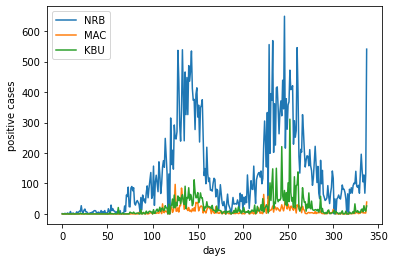

In [ ]:
fig = plt.figure()
plt.plot(covid['nairobi'])
plt.plot(covid['machakos'])
plt.plot(covid['kiambu'])
plt.xlabel('days')
plt.ylabel('positive cases')

plt.legend(['NRB', 'MAC', 'KBU'])
fig.savefig('Nairobi, Machakos and Kiambu cases over time.png')


### Ratio of male to female infections

In [ ]:
m2f = covid['male'].sum() / covid['female'].sum()
m2f


# result shows that for every male infected, 2 females tested positive.

1.7293827980191994

### Recovery to death ratio

In [ ]:
r2d = covid['recoveries'].sum() / covid['deaths'].sum()
r2d


# result shows that for every 46 recoveries made, 1 person loses their life

46.041620421753606

### Mortality rate

In [ ]:
mortality = (covid['deaths'].sum() / covid['positive_cases'].sum()) * 100
mortality


# result shows that there's an approximately 2% chance of death for every positive case.

1.826493274815273

### Recovery chances in case of infection.

In [ ]:
recover = (covid['recoveries'].sum() / covid['positive_cases'].sum()) * 100
recover
# result shows that there's an 84% chance of recover in case you contract it.

84.09471006193048

### Infection rate given a sample size

In [ ]:
infected = (covid['positive_cases'].sum() / covid['sample_size'].sum()) * 1000
infected

# result shows that there's 81 positive people for every 1000 people tested.

80.49918814611738

### Data grouped by months and years.

In [ ]:
covid.groupby(['year','month'])[['positive_cases', 'male', 'female', 'deaths', 'recoveries']].sum()

positive_cases     male   female  deaths  recoveries
year month                                                          
2020 April               337.0    203.0    134.0    16.0       141.0
     August            12960.0   8176.0   4784.0   237.0     11727.0
     December          11928.0   7509.0   4419.0   201.0     23393.0
     July              14270.0   9080.0   5190.0   193.0      5963.0
     June               4404.0   3084.0   1320.0    84.0      1565.0
     March                59.0     33.0     26.0     1.0         3.0
     May                1566.0   1039.0    527.0    47.0       330.0
     November          27457.0  16751.0  10706.0   473.0     18381.0
     October           15644.0  10253.0   5391.0   285.0     12055.0
     September          4123.0   2783.0   1340.0   133.0      5179.0
2021 February           2645.0   1635.0   1010.0    63.0      1100.0
     January            2535.0   1530.0   1005.0    64.0      2939.0
     March               731.0    436.0    295.0     5.0       191.0

### Pivot table of important statistics

In [ ]:
pd.pivot_table(covid, values=['deaths', 'positive_cases', 'recoveries', 'male', 'female']
               ,columns=['year', 'month'], aggfunc='sum')

year             2020                    ...     2021               
month           April   August December  ... February January  March
deaths           16.0    237.0    201.0  ...     63.0    64.0    5.0
female          134.0   4784.0   4419.0  ...   1010.0  1005.0  295.0
male            203.0   8176.0   7509.0  ...   1635.0  1530.0  436.0
positive_cases  337.0  12960.0  11928.0  ...   2645.0  2535.0  731.0
recoveries      141.0  11727.0  23393.0  ...   1100.0  2939.0  191.0

[5 rows x 13 columns]

### Infection rate through the months

In [ ]:
covid.drop(['Unnamed: 0'], axis=1, inplace=True)
covid.head()

,date,sample_size,positive_cases,male,female,recoveries,deaths,nairobi,mombasa,vihiga,kiambu,kisii,bungoma,nyamira,kakamega,kisumu,busia,kirinyaga,murang'a,bomet,migori,trans-nzoia,siaya,uasin_gishu,kericho,homa_bay,nyeri,nandi,nakuru,machakos,embu,meru,nyandarua,tharaka-nithi,elgeyo-marakwet,makueni,kilifi,kwale,west_pokot,narok,baringo,laikipia,kajiado,kitui,mandera,lamu,taita–taveta,garissa,samburu,wajir,turkana,isiolo,tana_river,marsabit,month,year
0,2020-03-12,21.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,March,2020
1,2020-03-13,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,March,2020
2,2020-03-14,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,March,2020
3,2020-03-15,30.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,March,2020
4,2020-03-16,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,March,2020


In [ ]:
Jan = covid[covid['month']=='January']
Jan.shape


# 26 days of January are available

(26, 56)

In [ ]:
Janrate = (Jan['positive_cases'].sum() / Jan['sample_size'].sum()) * 100
Janrate


# Every 1 in 50 has COVID 19 by January 2021

2.3091637821096738

In [ ]:
Feb = covid[covid['month']=='February']
Feb.shape
# shows how many days of February the data contains

(16, 56)

In [ ]:
Febrate = (Feb['positive_cases'].sum() / Feb['sample_size'].sum()) * 100

Febrate


# 1 in every 25 has COVID 19 by February 2021

4.092526690391459

In [ ]:
Mar = covid[(covid['month']=='March') & (covid['year']==2021)]
Mar.shape


# March data is insufficient to provide conclusive results

(1, 56)

In [ ]:
# Confirming overall infection rate at the moment again

(covid['positive_cases'].sum() / covid['sample_size'].sum()) * 100


# Explanation: The current positive percentage rate in Kenya stands at roughly 
# 8% . Meaning: As we are: 1 in 13 people have COVID 19 at the moment.

8.049918814611738